<a href="https://colab.research.google.com/github/MattStarDew/PUC/blob/main/Test2_ChristianMata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN CURSO IMAGE PROCESSING - PUC EEIGM October 2024 (20min)
Test 2 |
**Christian Mata**

Puedes utilizar los materiales del curso durante el examen.
Por favor, utiliza este cuaderno de Python para completar las siguientes preguntas:

# Image processing

  1. Lee una imagen en color y muestra el histograma original. Aplica ruido a la imagen y muestra el histograma. Compara ambos resultados. (Intenta mostrar una figura con dos imágenes).

The original image is type: uint8
M = 300 columns, N = 300 rows, NC = 3 color channels
The grayscale image is type: float64


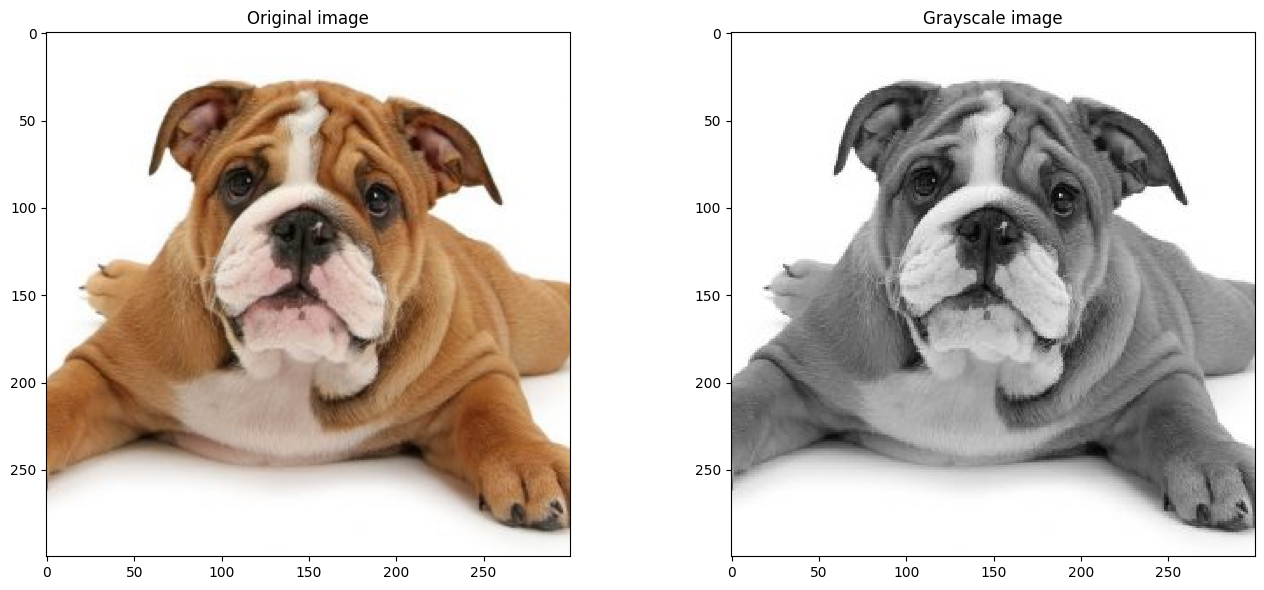

In [4]:
import skimage as sk # load skimage libraries
from skimage import io

import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/dog_image.jpg'
I2 = sk.io.imread(file_path) # read image using imread function
print('The original image is type:', I2.dtype)
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*I2.shape)) # Print out image size

IG = sk.color.rgb2gray(I2)
print('The grayscale image is type:',IG.dtype)

fig = plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.imshow(I2) # visualize image using imshow function, always colour
plt.title('Original image')

plt.subplot(122)
sk.io.imshow(IG) # visualize image using imshow function
plt.title('Grayscale image')
plt.show()

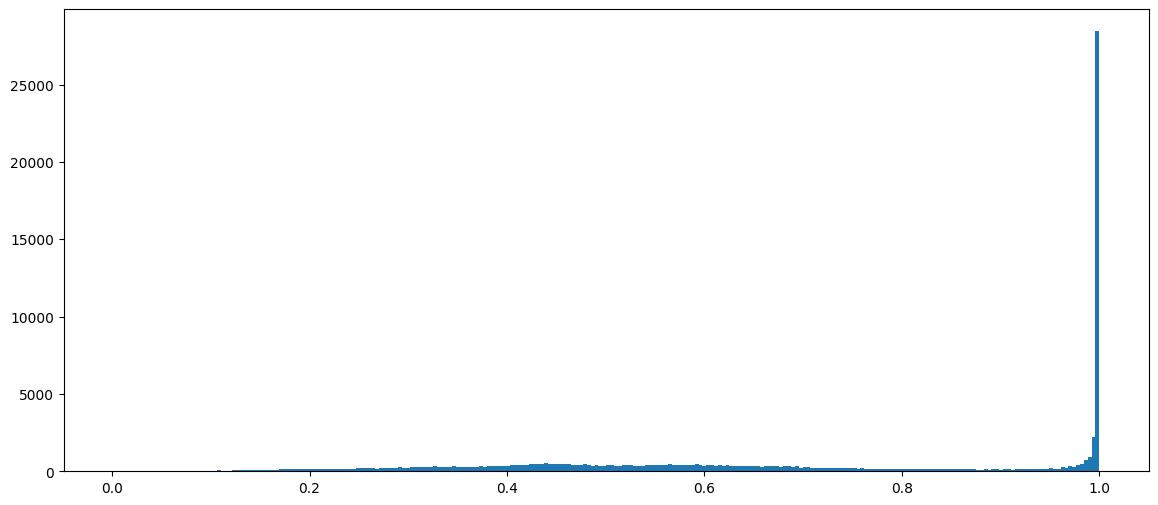

In [5]:
# reshape the uint8 image as 1d array:
v = IG.reshape(IG.shape[0]*IG.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

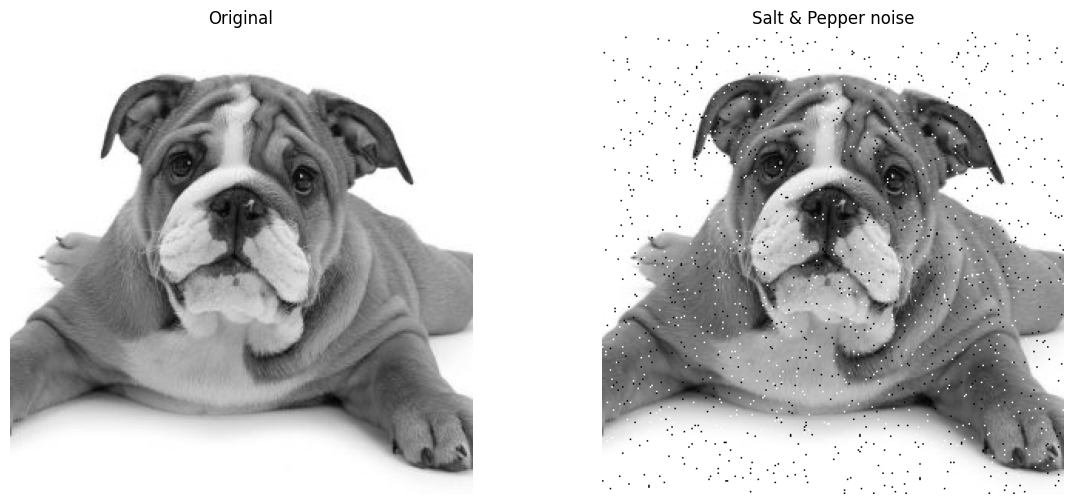

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte

img = IG

## Noisy image: Add some noise by randomly setting some pixels to 0 or 255 (salt and pepper noise)
noise = np.random.random(img.shape) # uniform random numbers between 0 and 1
noisy_image = img_as_ubyte(IG)
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0


def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 6), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

plot_comparison(img,noisy_image,'Salt & Pepper noise')
plt.savefig('Noisy.png')
img = img_as_ubyte(noisy_image)

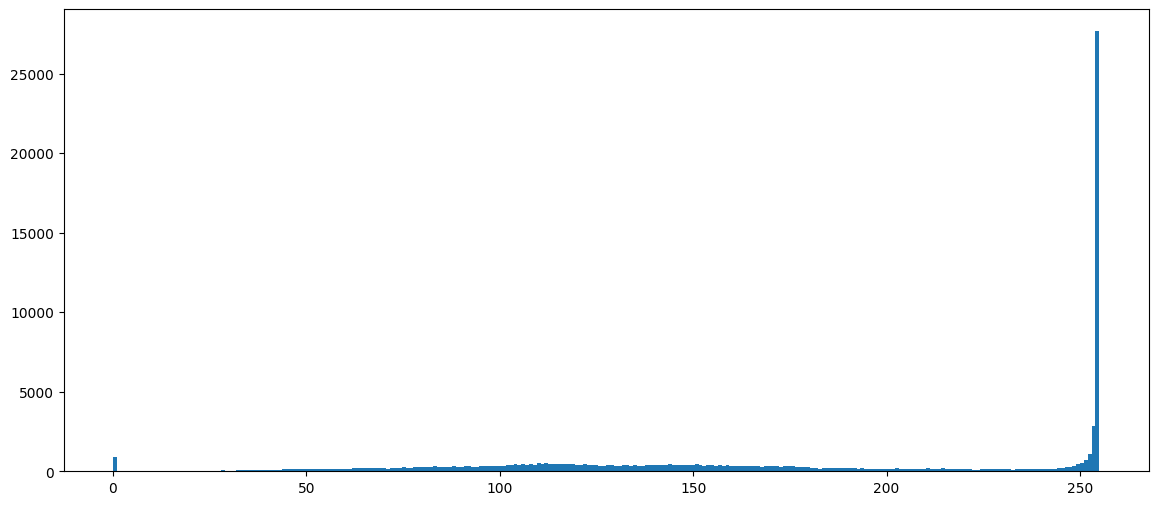

In [10]:
# reshape the uint8 image as 1d array:
v = img.reshape(IG.shape[0]*img.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

We can see on the new histogram more points at 0, so black points from the pepper

2. Ahora, ¿cómo podemos eliminar el ruido? Intenta utilizar diferentes filtros para corregir la imagen y muestra los resultados.

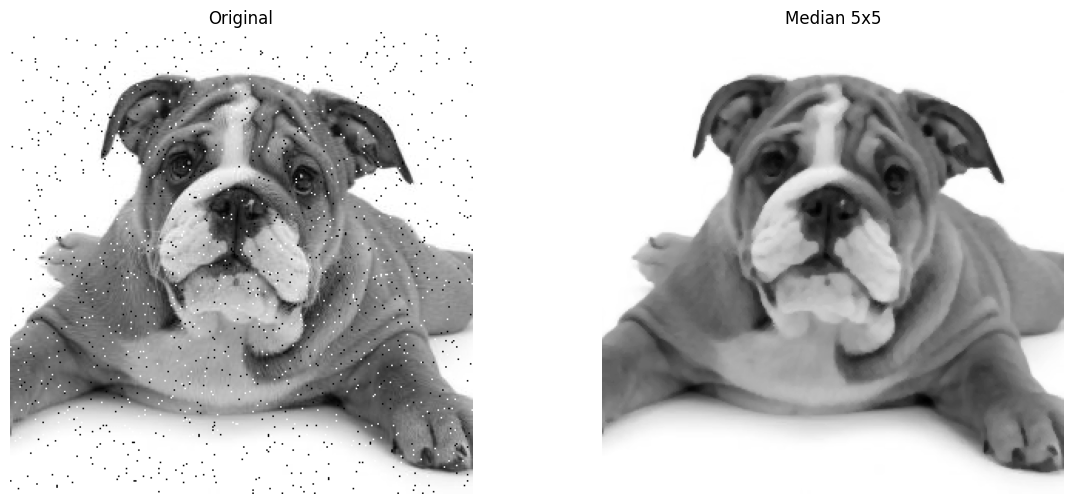

In [11]:
from skimage.morphology import disk
from skimage.filters import median

img = img_as_ubyte(noisy_image)
sel5 = disk(2) # structuring element disk radius 5 pixels
img_med5x5 = median(img, sel5)
plot_comparison(img,img_med5x5,'Median 5x5')
plt.savefig('median.png')


3. Segmentación no supervisada de una imagen en color: Descarga una imagen en color RGB, conviértela a escala de grises y aplica un algoritmo de k-means para segmentar las diferentes estructuras.

The original image is type: uint8
M = 867 columns, N = 1024 rows, NC = 3 color channels
The grayscale image is type: float64


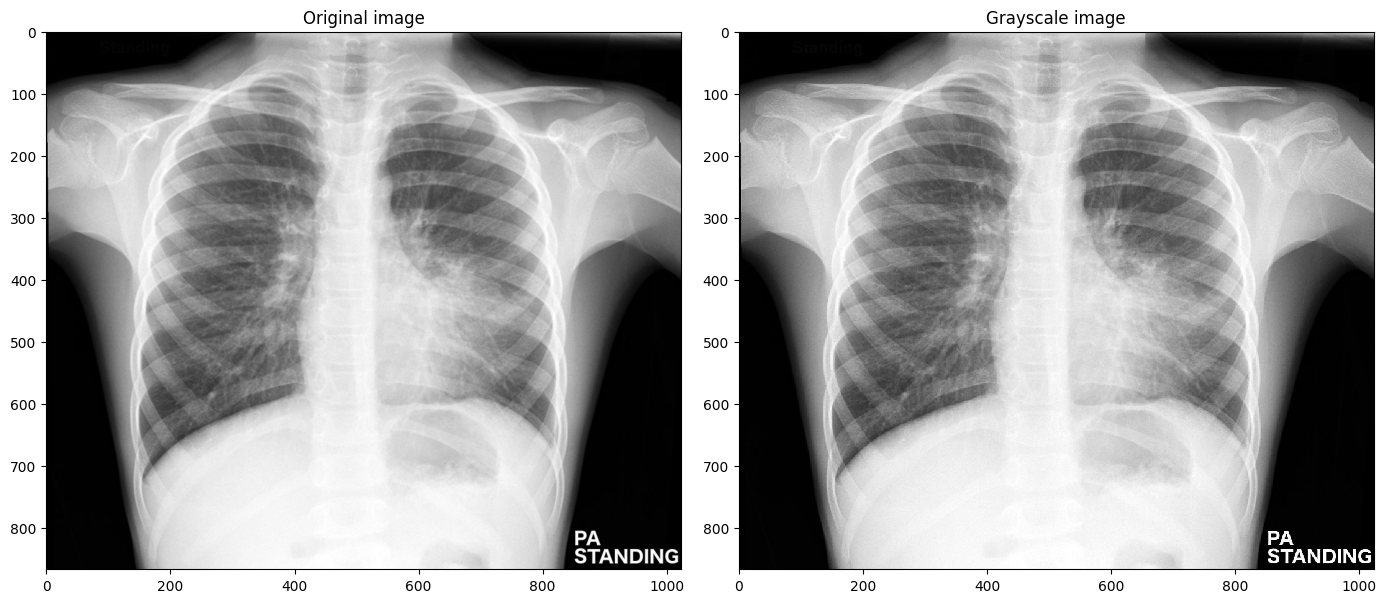

In [14]:
import skimage as sk # load skimage libraries
from skimage import io

import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/pneumo.jpg'
I2 = sk.io.imread(file_path) # read image using imread function
print('The original image is type:', I2.dtype)
print('M = {} columns, N = {} rows, NC = {} color channels'.format(*I2.shape)) # Print out image size

IG = sk.color.rgb2gray(I2)
print('The grayscale image is type:',IG.dtype)

fig = plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.imshow(I2) # visualize image using imshow function, always colour
plt.title('Original image')

plt.subplot(122)
sk.io.imshow(IG) # visualize image using imshow function
plt.title('Grayscale image')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# reshape training image as 1d array:
v_I_train = I_train.reshape(I_train.shape[0]*I_train.shape[1],1).astype(np.uint8)

# Fit a Kmeans clustering model with two clusters using training image:
kmeans = KMeans(n_clusters=2, random_state=0).fit(v_I_train)

# Apply to predict test image:
v_I_test = I_test.reshape(I_test.shape[0]*I_test.shape[1],1).astype(np.uint8) # reshape image as 1d array

v_kmeans = kmeans.predict(v_I_test)
#v_kmeans= np.logical_not(v_kmeans) # use when the pattern is associated to cluster 0 (vessels shoyld be white)
I_kmeans = np.array(v_kmeans).reshape(I_test.shape[0],I_test.shape[1]).astype(np.uint8) # Shape back result as image

fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(I_test, cmap=plt.cm.gray)
ax1.set_title('Original Image')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Prostate segmentation (Kmeans)')
ax2.set_axis_off()

plt.show()

4. De la imagen segmentada anterior aplica las técnicas necesarias para obtener propiedades de textura y entropía.

5. Explica brevemente porque la extracción de características de una imagen puede ser útil para el estudio de materiales?

It allows us to find irregularities. For example when looking at multiple object of the a similar size; an algorithm can find which ones are the biggest, or if they have a particular shape.

It can help to find defects. For example, augment the contrast to detect scratches in a material